В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook. 

Необходимые данные находятся в таблицах схемы `stackoverflow`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`


In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [ ]:

query = '''
SELECT DATE_TRUNC('month', creation_date)::date AS month_date,
       SUM(views_count) AS total_views
FROM stackoverflow.posts
WHERE EXTRACT(YEAR FROM creation_date) = 2008
GROUP BY DATE_TRUNC('month', creation_date)
ORDER BY SUM(views_count) DESC
'''



question_1 = pd.read_sql_query(query, con=engine) 
question_1

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

* Ответ:


Количество просмотров растет с открытием проекта в августе 2008 года, достигая пиковых значний в сентябре. Дальнейший спад и выход на 'плато' можно охарактеризовать большим количеством, устоявшихся решений на самые часты и популярные вопросы пользователей, которым уже не требуется проводить на сайте большее время.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [ ]:

query = '''
SELECT use.display_name,
       COUNT(DISTINCT post.user_id)
       
FROM stackoverflow.posts AS post
JOIN stackoverflow.users AS use 
ON post.user_id=use.id
JOIN stackoverflow.post_types AS pt
ON pt.id=post.post_type_id

WHERE post.creation_date::date BETWEEN use.creation_date::date AND (use.creation_date::date + INTERVAL '1 month') 
      AND pt.type LIKE 'Answer'
GROUP BY use.display_name
HAVING COUNT(post.id) > 100
ORDER BY use.display_name
'''

question_2 = pd.read_sql_query(query, con = engine)
question_2


,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


Какие аномалии наблюдаются в данных? О чём они говорят?

In [8]:
question_2.loc[question_2['count'] > 2].sort_values(by = 'count', ascending = False)

,display_name,count
10,Chris,29
45,Matt,29
14,Dan,21
64,Tom,19
41,Mark,17
33,Josh,16
50,Nick,16
7,Brian,15
56,Rob,15
21,Greg,12


In [9]:
query = '''
SELECT u.display_name,
       COUNT(DISTINCT p.user_id)
FROM stackoverflow.posts AS p
JOIN stackoverflow.users AS u 
ON p.user_id = u.id
WHERE u.display_name = 'Chris'
GROUP BY u.display_name
'''

question_2_chek = pd.read_sql_query(query, con = engine)
question_2_chek

,display_name,count
0,Chris,39


В подобном запросе пользователи с одинаковыми именами, но разными id считаются как один и тот же пользователь, что ведет к подобным, статистическим выбросам как 'Chris'. Но не без исключения каких-либо ошибок в самом сборе данных.

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [ ]:

query = '''

WITH 

u AS

(SELECT u.id
FROM stackoverflow.posts AS p
JOIN stackoverflow.users AS u 
ON p.user_id=u.id
WHERE (u.creation_date::date BETWEEN '2008-09-01' AND '2008-09-30')
AND (p.creation_date::date BETWEEN '2008-12-01' AND '2008-12-31')
GROUP BY u.id)


SELECT DATE_TRUNC('month', p.creation_date)::date AS month,
       COUNT(p.id)
FROM stackoverflow.posts AS p
WHERE p.user_id IN 

        (SELECT *
        FROM u)
        
      AND DATE_TRUNC('year', p.creation_date)::date = '2008-01-01'
GROUP BY DATE_TRUNC('month', p.creation_date)::date
ORDER BY DATE_TRUNC('month', p.creation_date)::date DESC

'''



question_3 = pd.read_sql_query(query, con = engine)
question_3

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

* Ответ:

Пользователи зарегичтрированные в сентябре не могут оставлять посты в августе того же года
ошибка в самой базе данных.

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [ ]:

query = '''
SELECT user_id, creation_date, views_count,
       SUM (views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM stackoverflow.posts
ORDER BY user_id, creation_date

'''


question_4 = pd.read_sql_query(query, con = engine)
question_4



,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [ ]:

query = '''
WITH 

t AS

(SELECT user_id,
       DATE_TRUNC('day', creation_date)::date,
       COUNT(id) AS pstn
FROM stackoverflow.posts
WHERE user_id IN

    (SELECT user_id
    FROM stackoverflow.posts
    WHERE creation_date::date BETWEEN '2008-08-01' AND '2008-08-31'
    GROUP BY user_id
    HAVING COUNT(id) > 120)
    
GROUP BY user_id, DATE_TRUNC('day', creation_date)::date)



SELECT t.user_id,
       AVG(t.pstn) AS avg_daily
FROM t
WHERE DATE_TRUNC('month', t.date_trunc)::date = '2008-08-01'
GROUP BY t.user_id
ORDER BY avg_daily

'''



question_5 = pd.read_sql_query(query, con = engine)
question_5

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [ ]:

query = '''
WITH 

t AS

(SELECT user_id,
       COUNT(DISTINCT DATE_TRUNC('day', creation_date)::date)
FROM stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07'
GROUP BY user_id)


SELECT ROUND(AVG(count))::int AS result
FROM t

'''



question_6 = pd.read_sql_query(query, con = engine)
question_6

,result
0,2


Проанализируйте итоговую таблицу — какие выводы можно сделать?

* Ответ:

Можно сделать вывод,что за период с 1 по 7 декабря 2008 года пользователи в среднем взаимодействовали 2 дня.


# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [ ]:

query = '''
WITH

t AS

(SELECT user_id, 
       creation_date,
       LAG(creation_date, 2) OVER (PARTITION BY user_id ORDER BY creation_date)::date AS lg
FROM stackoverflow.posts
ORDER BY user_id, creation_date)


SELECT user_id,
       creation_date, 
       CASE
           WHEN EXTRACT(MONTH FROM lg) = 7.0 THEN 'July'
           WHEN EXTRACT(MONTH FROM lg) = 8.0 THEN 'August'
           WHEN EXTRACT(MONTH FROM lg) = 9.0 THEN 'September'
           WHEN EXTRACT(MONTH FROM lg) = 10.0 THEN 'October'
           WHEN EXTRACT(MONTH FROM lg) = 11.0 THEN 'November'
           WHEN EXTRACT(MONTH FROM lg) = 12.0 THEN 'December'
       END
FROM t

'''



question_7 = pd.read_sql_query(query, con = engine)
question_7

,user_id,creation_date,case
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [17]:
query = '''


'''

In [ ]:

query = '''
WITH 

p AS

(  WITH 

t AS

(SELECT DISTINCT user_id,
       FIRST_VALUE(DATE_TRUNC('month', creation_date)) OVER 
       (PARTITION BY user_id ORDER BY creation_date) AS cohort_dt
FROM stackoverflow.posts)

SELECT *,
      COUNT(user_id) OVER (PARTITION BY cohort_dt) AS cucount
FROM t),


 s AS 
 
(SELECT user_id,
       DATE_TRUNC('month', creation_date) AS session_date
FROM stackoverflow.posts
GROUP BY user_id, session_date)
         
 
 
 
SELECT p.cohort_dt,
       s.session_date,
       COUNT(p.user_id) AS users_cnt,
       p.cucount,
       ROUND(COUNT(p.user_id) * 100.0 / cucount, 2) AS retention_rate
       
FROM p JOIN s 
ON p.user_id = s.user_id
GROUP BY 1,
         2,
         4
ORDER BY cohort_dt, session_date
        
         

'''





question_8 = pd.read_sql_query(query, con = engine)
question_8

,cohort_dt,session_date,users_cnt,cucount,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

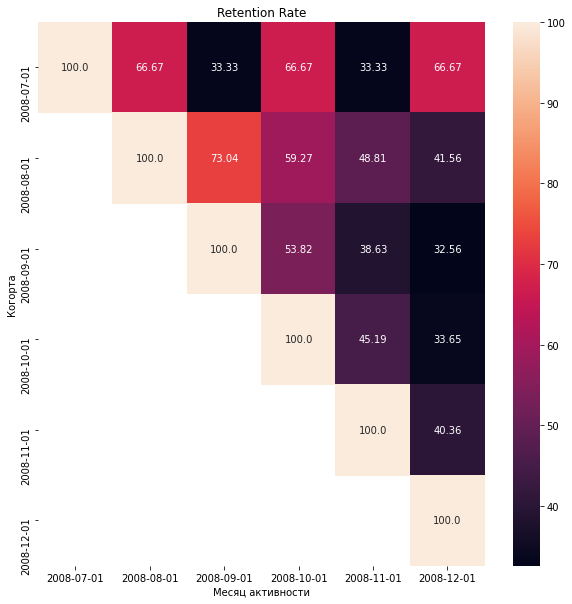

In [21]:

retention = question_8.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]
plt.figure(figsize=(10, 10)) 
sns.heatmap(retention, 
            annot=True, 
            fmt='') 
plt.title('Retention Rate') 
plt.ylabel('Когорта')
plt.xlabel('Месяц активности')
plt.show()

Динамика удержания первой кагорты не изменяется со временем в меньшую сторону, а имеет четкую периодичность и является выбросом в общую статистику ввиду наличия в когорте всего трёх челвек.


Каждая следующая когорта показывает всё больший спад удержания относительно предыдущего периода.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [ ]:

query = '''
WITH

t AS

(SELECT EXTRACT(MONTH FROM creation_date)::int AS creation_month,
       COUNT(id) AS posts_count 
FROM stackoverflow.posts
WHERE EXTRACT(MONTH FROM creation_date)::int BETWEEN 9 AND 12
GROUP BY creation_month)


SELECT *,
       ROUND((posts_count::numeric/LAG(posts_count) OVER()-1)*100, 2) AS percentage
       
FROM t

'''



question_9 = pd.read_sql_query(query, con = engine)
question_9

,creation_month,posts_count,percentage
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

Сумма постов за 4 месяца: 225040


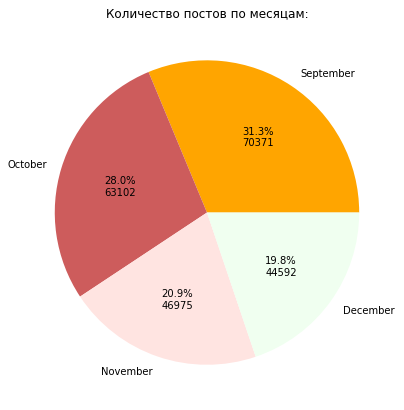

In [23]:
month = ['September','October','November','December']
count = question_9['posts_count']


"Добавляем общее количество, для следующей функции"

print('Сумма постов за 4 месяца:',total_value := count.sum())

"""
\\\\
Пишем функцию, которая выдаст 
количество постов вместе с процентами
и подставляем её в autopct
////
"""
def y_a_f(prct_value):
    return '{:.1f}%\n{:.0f}'.format(prct_value, total_value*prct_value/100)


fig, ax = plt.subplots(figsize = (10,7))
ax.pie(count, labels = month, autopct = y_a_f, colors = ['orange','indianred','mistyrose','honeydew'])
#'%1.1f%%')

plt.title('Количество постов по месяцам:')
plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [ ]:

query = '''
WITH 

au AS

(SELECT user_id,
       COUNT(id)
FROM stackoverflow.posts
GROUP BY user_id
ORDER BY COUNT(id) DESC
LIMIT 1)



SELECT EXTRACT(WEEK FROM p.creation_date)::int AS week_creation,
       MAX(p.creation_date) AS creation_date
FROM au
JOIN stackoverflow.posts AS p
ON au.user_id=p.user_id
WHERE DATE_TRUNC('month', p.creation_date)::date = '2008-10-01'
GROUP BY week_creation

'''



question_10 = pd.read_sql_query(query, con = engine)
question_10

,week_creation,creation_date
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01
